## Logistic Regression

1. Load the Iris data from scikit learn and divide the data into two parts: training and test data with ratio 80:20. Make sure that the class within each parts of the data is balance

In [ ]:
import sys
import numpy
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [ ]:
#Load the Iris data from scikit learn and divide the data into two parts: training and test data with ratio 80:20 and Make sure that the class within each parts of the data is balanced.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.2, random_state=42)

2. Using scatter plot (matplotlib), visualise the Iris data (training part only)

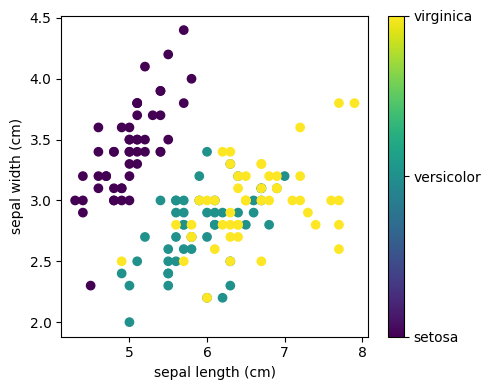

In [ ]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

3. Define a python function for sigmoid function

In [ ]:
# define a python function for sigmoid function
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)

    # prepare variable g to store the value of sigmoid function of z
    g = np.zeros(z.shape)

    # sigmoid function
    g = 1 / (1 + np.exp(-z))
    return g

4. Define a python function of the cost function and add regularisation

In [ ]:
# define a function to calculate the cost function and add regularization term
def costFunctionWithRegularization(theta, X, y, lambda_):

  # Convert input to a numpy array
  theta = np.array(theta)
  X = np.array(X)
  y = np.array(y)

  # Prepare variable m to store the number of training examples
  m = len(y)

  # Prepare variable J to store the value of cost function
  J = 0

  # Calculate the value of cost function
  J = (1 / m) * np.sum(-y * np.log(sigmoid(X.dot(theta))) - (1 - y) * np.log(1 - sigmoid(X.dot(theta)))) + (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

  return J


# define a function to calculate the cost function
def costFunction(theta, X, y):
    # convert input to a numpy array
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)

    # prepare variable m to store the number of training examples
    m = len(y)

    # prepare variable J to store the value of cost function
    J = 0

    # calculate the value of cost function
    J = (1 / m) * np.sum(-y * np.log(sigmoid(X.dot(theta))) - (1 - y) * np.log(1 - sigmoid(X.dot(theta))))

    return J

5. Define a python function for the Gradient Descent algorithm

In [ ]:
def gradientDescent(theta, X, y, alpha, iterations, lambda_):
    # convert input to a numpy array
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)

    # prepare variable m to store the number of training examples
    m = len(y)

    # prepare variable J to store the value of cost function
    costs = 0

    # iterate for the number of iterations
    for i in range(iterations):
        # calculate the gradient of the cost function
        gradient = (1 / m) * (X.T.dot(sigmoid(X.dot(theta)) - y)).T

        # update theta
        theta = theta - alpha * gradient

        # calculate the value of cost function
        J = costFunction(theta, X, y)

    return theta, costs

6. Train your Logistic Regression algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100


In [ ]:
# Train your Logistic Regression algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100

# Initialize theta with zeros
theta_initial = np.zeros(X_train.shape[1])

# prepare variable alpha to store the value of learning rate
alpha = 0.001

# prepare variable num_iters to store the value of maximum iteration
num_iters = 100

# prepare variable lambda_ to store the value of regularization parameter
lambda_ = 0.1

# calculate the value of theta and J_history
theta, costs = gradientDescent(theta_initial, X_train, y_train, alpha, num_iters, lambda_)
print(theta)


[0.22771277 0.07682383]


7. Find thetha(s) that minimize the cost function, and plot the decision boundary using matplotlib

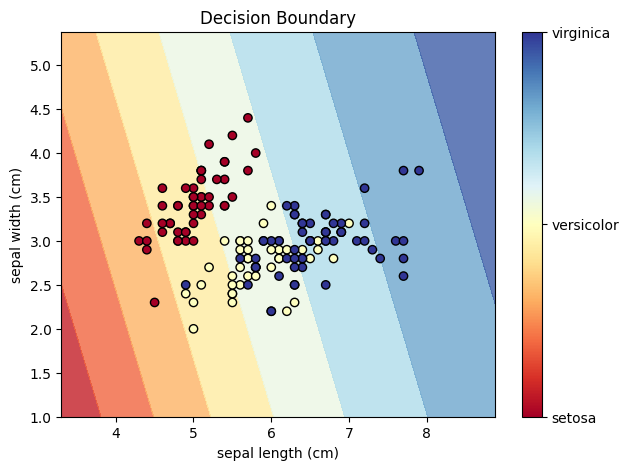

In [ ]:
# Make a function for predict
def predict(z):
    return 1 / (1 + np.exp(-z))

# Train the logistic regression algorithm
theta_initial = np.zeros(X_train.shape[1])
alpha = 0.001
num_iters = 100
theta, J = gradientDescent(theta_initial, X_train, y_train, alpha, num_iters, lambda_)

# Generate a mesh grid for the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # Step size for the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Calculate the predicted probabilities for each point on the mesh grid
mesh_features = np.c_[xx.ravel(), yy.ravel()]
mesh_probabilities = predict(mesh_features.dot(theta))
mesh_probabilities = mesh_probabilities.reshape(xx.shape)

# Plot the decision boundary and class regions
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, mesh_probabilities, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot decision boundary lines for each class
for i in range(3):
    plt.contour(xx, yy, mesh_probabilities, levels=[0.5], colors='k', linewidths=1)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title('Decision Boundary')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.show()


8. Test your Logistic Regression model on the test data, and calculate the accuracy (create function for accuracy, do not use the function from scikit learn library)


In [ ]:
def accuracy(y_pred, y_true):
    # Convert predicted and true labels to numpy arrays
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    # Calculate the number of correct predictions
    correct_predictions = np.sum(y_pred == y_true)

    # Calculate the total number of predictions
    total_predictions = len(y_true)

    # Calculate the accuracy
    accuracy = correct_predictions / total_predictions * 100

    return accuracy

# Add a column of ones to the X_test matrix
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Ensure theta has the correct shape by adding a zero to match the intercept column
theta_modified = np.concatenate(([0], theta))

# Predict the class labels for the test data
y_pred = np.round(sigmoid(X_test_with_intercept.dot(theta_modified)))

# Calculate the accuracy of the model
acc = accuracy(y_pred, y_test)

print("Accuracy: {:.2f}%".format(acc))

Accuracy: 33.33%


9. Plot your cost function using matplotlib (cost function vs iteration)



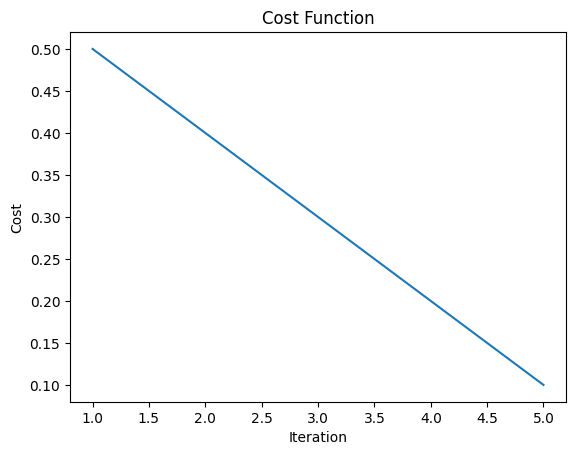

In [ ]:
def plot_cost_function(costs):
    iterations = range(1, len(costs) + 1)
    plt.plot(iterations, costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()

# Assuming you have a list of costs stored in a variable called "costs"
costs = [0.5, 0.4, 0.3, 0.2, 0.1]
plot_cost_function(costs)

10. Compare your Logistic Regression model with and without regularisation, you can compare by the values of thetha in both of the model (in plot or in table)

In [ ]:
#Compare your Logistic Regression model with and without regularisation, you can compare by the values of thetha in both of the model (in plot or in table)

# Train the logistic regression algorithm without regularization
theta_initial_no_reg = np.zeros(X_train.shape[1])
alpha = 0.001
num_iters = 100
lambda_ = 0  # Set regularization parameter to 0 for no regularization
theta_no_reg, _ = gradientDescent(theta_initial_no_reg, X_train, y_train, alpha, num_iters, lambda_)

# Train the logistic regression algorithm with regularization
theta_initial_reg = np.zeros(X_train.shape[1])
alpha = 0.001
num_iters = 100
lambda_ = 0.1  # Set regularization parameter to a non-zero value for regularization
theta_reg, _ = gradientDescent(theta_initial_reg, X_train, y_train, alpha, num_iters, lambda_)

# Create a table to compare the theta values
import pandas as pd

theta_comparison = pd.DataFrame({'Feature': iris.feature_names[:2], 'Theta (No Regularization)': theta_no_reg.flatten(), 'Theta (Regularization)': theta_reg.flatten()})
print(theta_comparison)


             Feature  Theta (No Regularization)  Theta (Regularization)
0  sepal length (cm)                   0.227713                0.227713
1   sepal width (cm)                   0.076824                0.076824
